# Linear Regression Practice

설치할 라이브러리: ``numpy``, ``pandas``, ``matplotlib``, ``seaborn``,  ``scikit-learn``, ``statsmodels``

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## California Housing Data

We will use California Housing dataset. See the description https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# as_frame=True: Pandas data frame
# as_frame=False: numpy 

In [3]:
# structure of the Python object
dir(california_housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [14]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
california_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Description of the dataset
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Overview of Dataset

In [5]:
housing = california_housing.frame

In [6]:
# First 10 observations (rows)
housing.head(10) # pandas dataframe 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that:

- the dataset contains 20,640 samples and 8 features;
- all features are numerical features encoded as floating number;
- there is no missing values.

Let’s have a quick look at the distribution of these features by plotting their histograms.

Note:
MedInc(중위 소득), Housing Age(주택 연식), AveRooms(평균 방 개수), AveBedrms(평균 침실 수), Population(인구 수), AveOccup(평균 거주자 수), Latitude(위도), Longitude(경도)

## Visualization

### Histogram

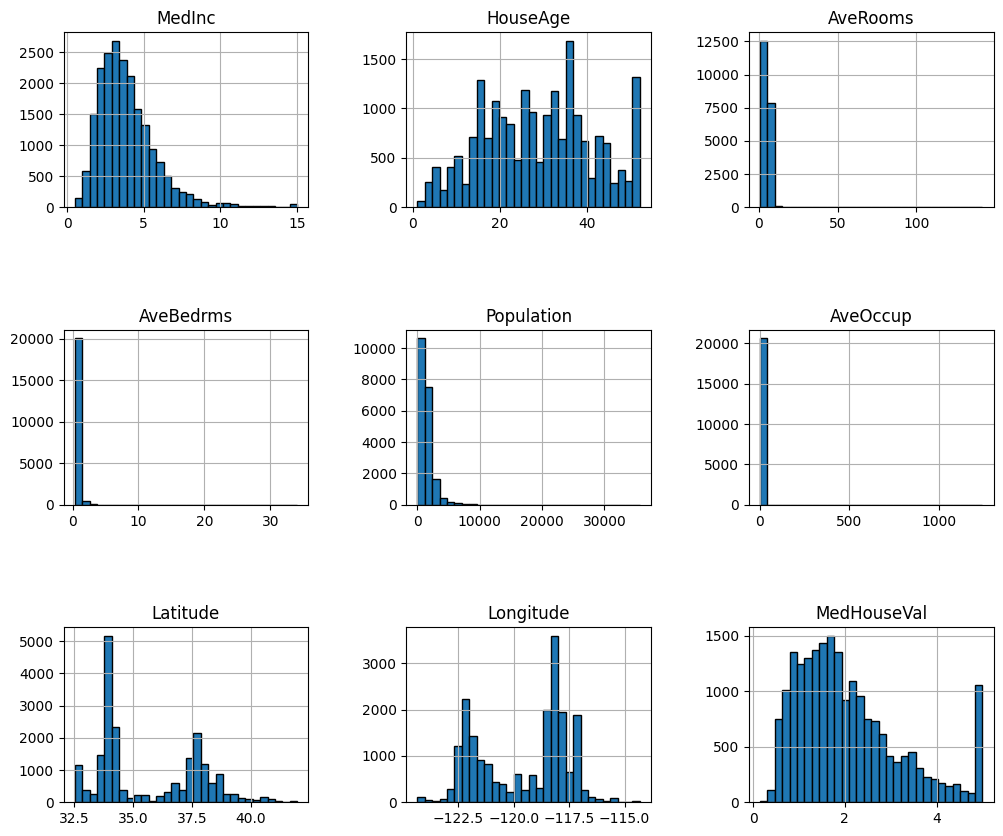

In [9]:
housing.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [10]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


### Scatterplot

<Axes: xlabel='Longitude', ylabel='Latitude'>

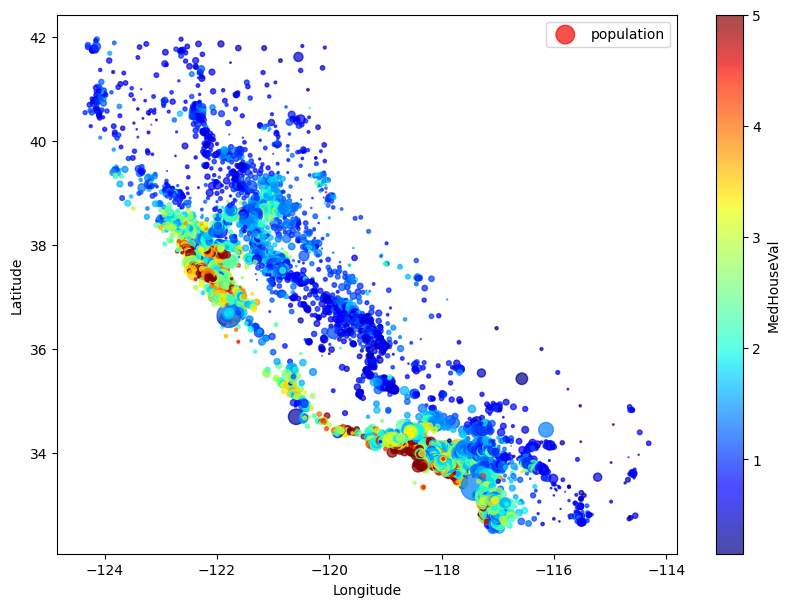

In [11]:
housing.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet",
             colorbar=True, legend=True, sharex=False, figsize=(10,7),
             s=california_housing.frame['Population']/100, label="population", alpha=0.7)


### Pair Plot

 We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.


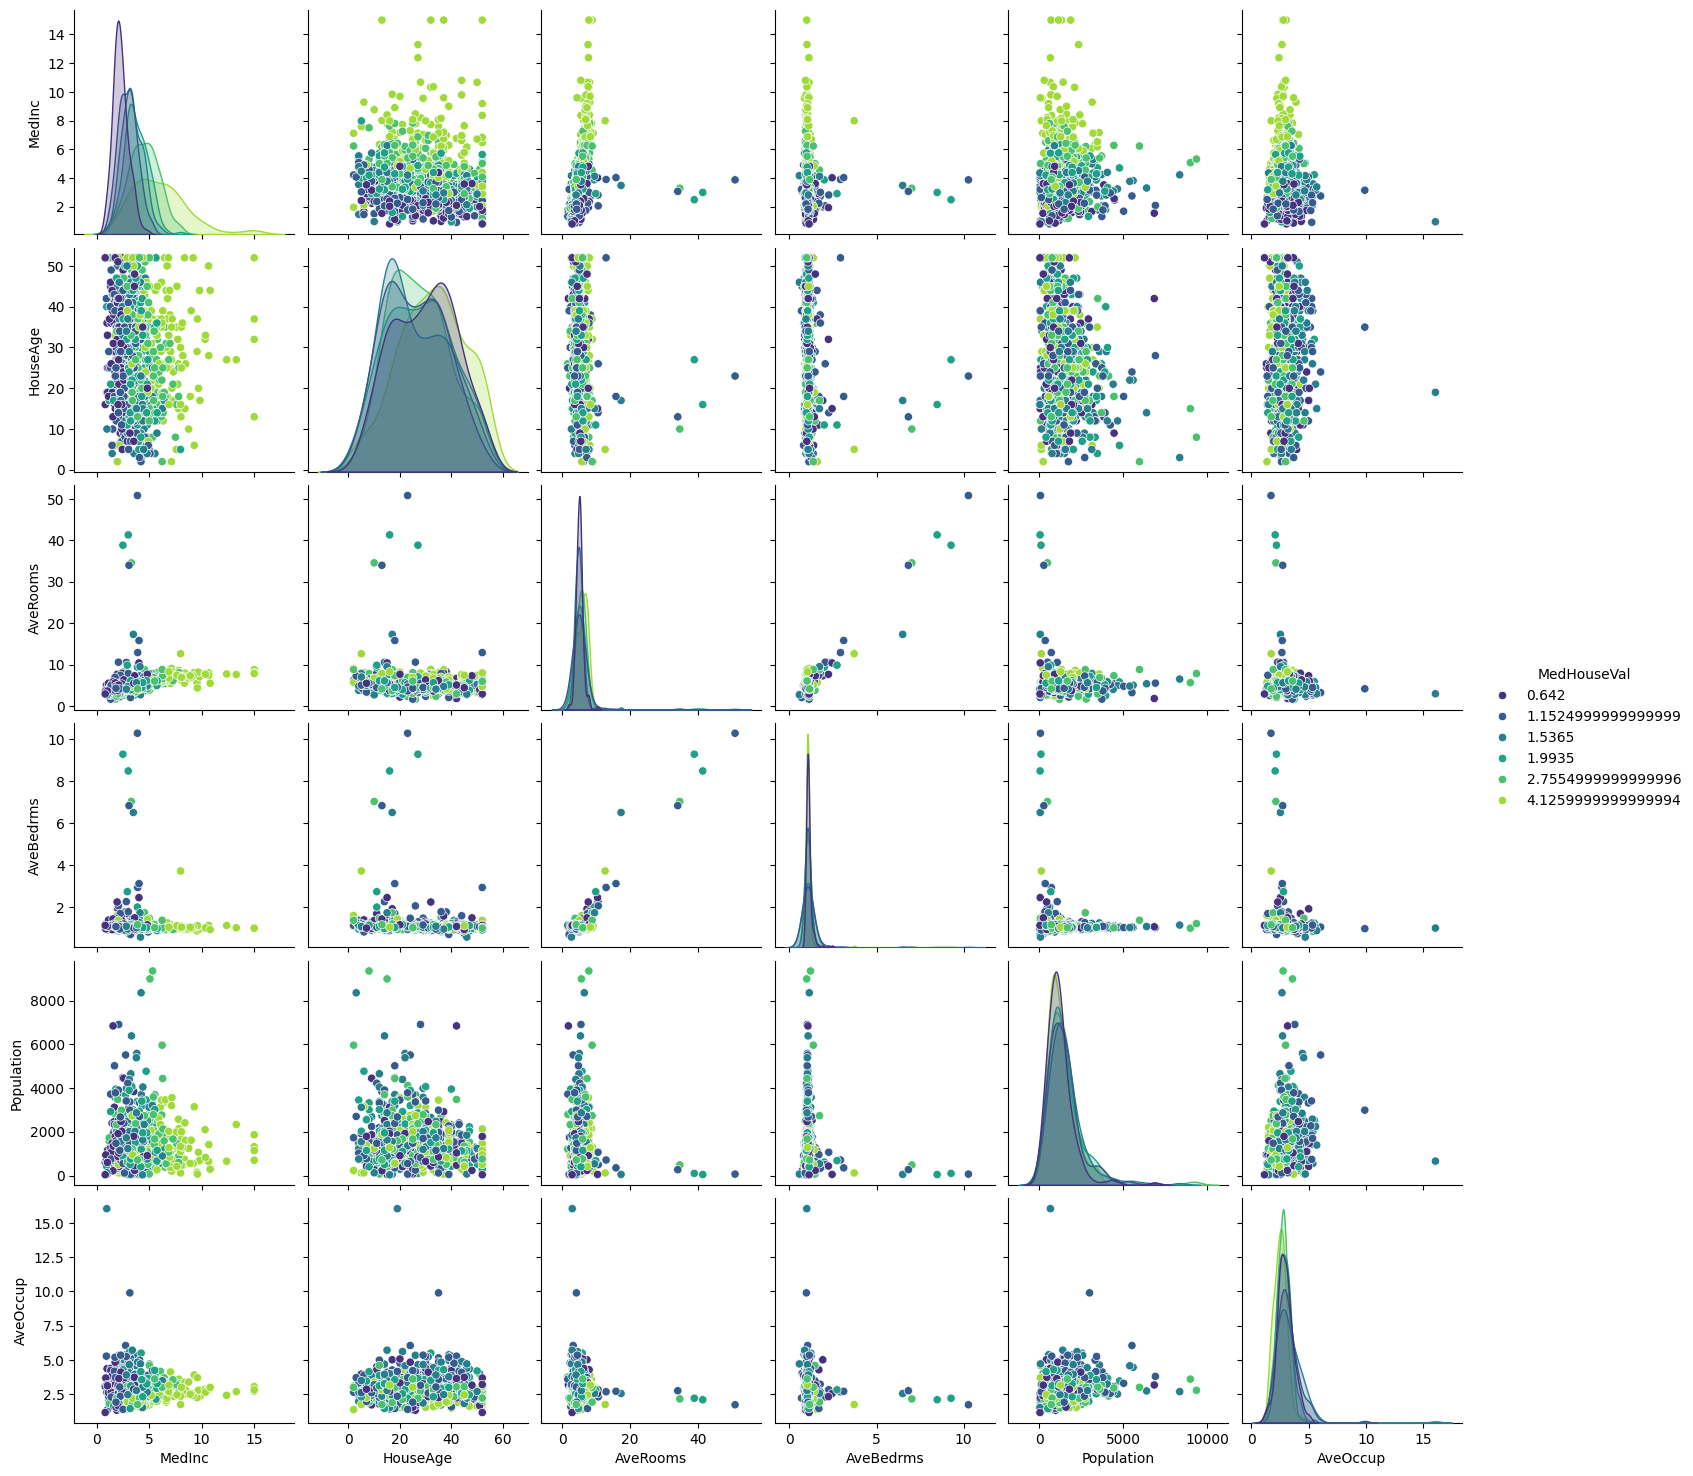

In [15]:
# Pair Plot

# too large data points. Let's choose locations randomly
rng = np.random.RandomState(0)
indices = rng.choice(
    np.arange(california_housing.frame.shape[0]), size=1000, replace=False
)

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
#subset = california_housing.frame.drop(columns=columns_drop) # Using the whole dataset
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop) # using the random sample

# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")


### Correlation

In [16]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


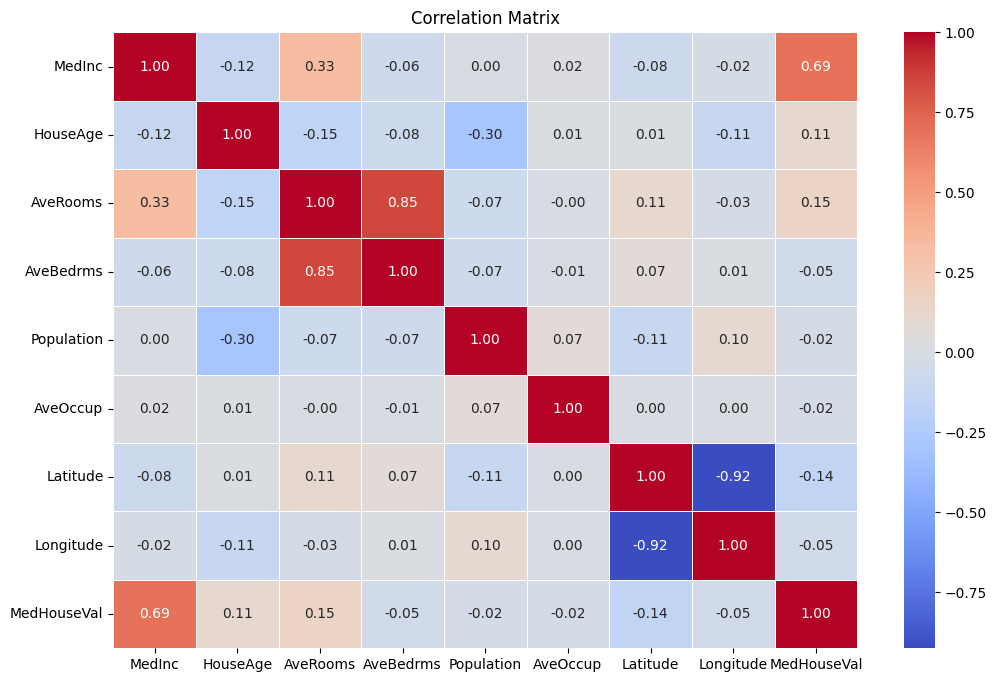

In [17]:
corr_matrix = housing.corr() 
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Heatmap
plt.title('Correlation Matrix')
plt.show()

Any comments on the visualizations?

- HouseAge>50
- MedHouseVal > 500K?
- Potential Outliers?

## Run Linear Regression

### Train/Test Split

In [68]:
X = california_housing.data # Reamining Varaiables
# X = X.drop(columns=["MedInc", "HouseAge", "AveOccup"]) # Drop the columns

y = california_housing.target # Median House Val

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=511
)


### with Scikit-Learn

Let's start with the scikit-learn library (for general ML tasks)

In [69]:
from sklearn.linear_model import LinearRegression

# Call the Linear Regression Class
model = LinearRegression()

# Fit the data
model.fit(X_train, y_train)

# Prediction (of test data)
y_test_pred = model.predict(X_test)

#### Coefficients Interpretation

In [61]:
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("절편:", intercept)
print("회귀계수:\n", coefficients)

절편: -61.357534943101626
회귀계수:
 AveRooms      0.348541
AveBedrms    -1.323270
Population   -0.000027
Latitude     -0.754090
Longitude    -0.751819
dtype: float64


In [70]:
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("절편:", intercept)
print("회귀계수:\n", coefficients)

절편: -36.27551338915081
회귀계수:
 MedInc        0.440538
HouseAge      0.009045
AveRooms     -0.113074
AveBedrms     0.625681
Population   -0.000005
AveOccup     -0.003450
Latitude     -0.415087
Longitude    -0.427495
dtype: float64


- MedInc (Median Income): 양(+)의 값 → 소득이 높을수록 집값이 상승

- HouseAge: 미약한 양(+) → 집이 오래되면 약간 더 비싸짐

- AveRooms: 음(-) → 방의 평균 수가 많다고 반드시 비싸지 않음

- Latitude, Longitude: 음(-) → 북쪽/동쪽으로 갈수록 가격이 낮아지는 경향

#### Performance Test

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.5267
R²: 0.6037


- 평균제곱오차(MSE): 0.53 → 예측값과 실제값의 제곱 차이가 평균적으로 0.53

- 결정계수(R²): 0.60 → 분산의 약 60%만 설명. 나머지 40%는 설명 불가능

소득이 높고, 위치에 따라 집값이 달라진다. 선형 회귀로는 전체 집값의 60% 정도만 설명 가능하다 → 비선형 관계가 있거나, 변수 간 상호작용을 고려하지 못함

### With Statsmodels

통계적 모형분석에 대한 더 많은 기능을 제공. 가설검정, 신뢰구간, 추론 등

In [72]:
import statsmodels.api as sm

# Add 1 vector to the design matrix (Train set)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est = est.fit()

# Add 1 vector to the design matrix (Test set)
X2_test = sm.add_constant(X_test)
y_test_pred = est.predict(X2_test)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.5267
R²: 0.6037


In [73]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3178.
Date:                Sat, 19 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:22:12   Log-Likelihood:                -18099.
No. Observations:               16512   AIC:                         3.622e+04
Df Residuals:                   16503   BIC:                         3.629e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2755      0.744    -48.756      0.0

지표	의미
- R-squared	결정계수 (설명된 변동성의 비율)
- Adj. R-squared	변수 개수를 보정한 결정계수
- coef	각 변수의 회귀계수
- std err	표준오차 (계수 추정값의 표준편차)
- t, P>	t
- [0.025, 0.975]	계수의 95% 신뢰구간 (Confidence Interval, CI)
- F-statistic, Prob(F)	전체 회귀모형의 유의성 검정

예:
- 유의확률(P>|t|)이 0.05보다 작으면 통계적으로 유의 → 이 변수는 집값에 영향을 미친다고 볼 수 있음
- 신뢰구간에 0이 포함되지 않으면 유의함
- F-test가 유의하면, 전체 모형이 유의하다는 뜻

### 회귀분석의 가정
선형회귀분석의 추론이 타당하려면 고전적 선형회귀모형의 가정이 만족돼야 합니다:

가정	내용
1. 선형성	독립변수와 종속변수 사이의 관계는 선형
2. 독립성	오차항은 서로 독립
3. 등분산성	오차항의 분산이 일정 (Homoscedasticity)
4. 정규성	오차항이 정규분포
5. 다중공선성 없음	독립변수 간 선형종속성 없음

이 중 일부는 모형이 크게 벗어나면 추론 결과(예: p-value, CI)가 왜곡될 수 있습니다.



### 선형성 가정 확인
Residual vs Fitted plot

선형성 가정: 예측값과 잔차가 일정한 패턴 없이 흩어져야 함

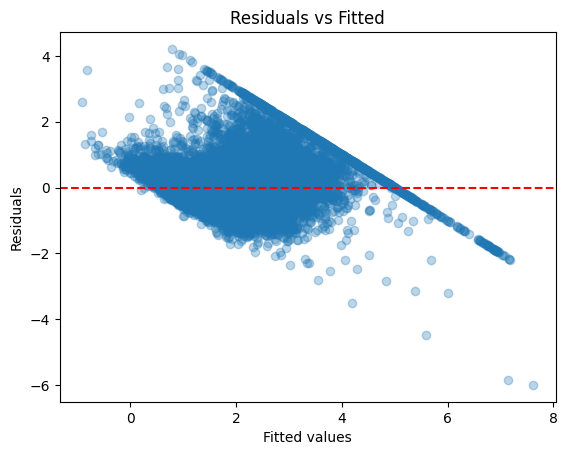

In [74]:
import matplotlib.pyplot as plt
y_pred = est.predict(X2) # fitted value; train-pred
residuals = y_train - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

### 정규성

- Q-Q plot: 직선 위에 점들이 나타나야 함 (대부분이)
- Shapiro-Wilk Test: 귀무가설: 정규분포, 대립가설: 정규분포가 아니다. p-value가 매우 낮으면(reject) 정규성 가정 따른다고 할 수 없음

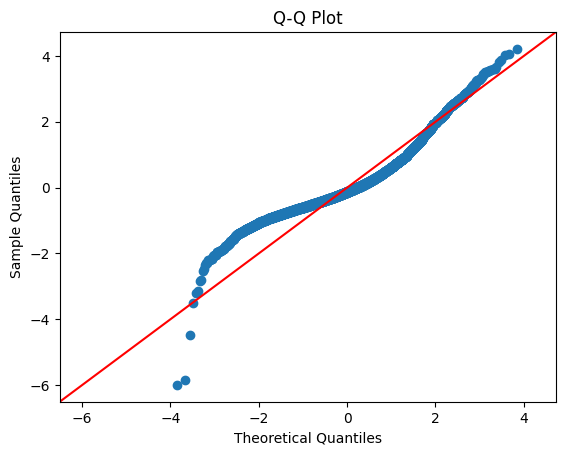

Shapiro-Wilk test: p-value = 0.0000


/Users/cheoljunpark/ds_course/das511/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16512.
  res = hypotest_fun_out(*samples, **kwds)


In [75]:
import scipy.stats as stats

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

# Shapiro-Wilk test
stat, p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test: p-value = {p:.4f}")


### 등분산성

잔차의 분산이 일정 (관측치 넘버링마다 pattern이 있으면 안됨)

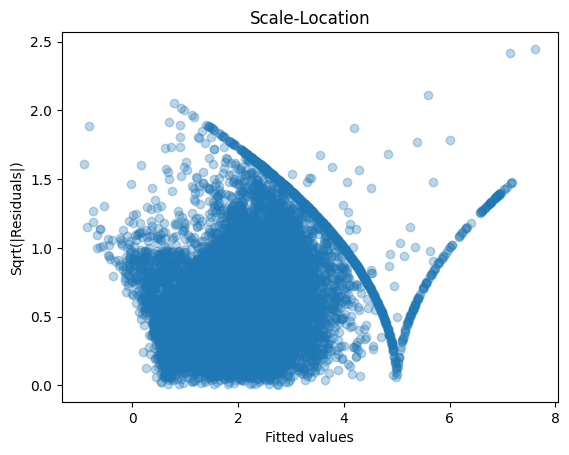

In [76]:
plt.scatter(y_pred, abs(residuals)**0.5, alpha=0.3)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location")
plt.show()


가정이 위반되면:

- 비선형성 → 비선형 모형(polynomial reg. 등), Transformation

- 정규성 → 로그변환, Box-Cox 변환, robust regression

- 이분산성 → WLS(가중회귀), robust SE

- 자기상관 → 시계열 모형